
# Lecture 12: Probability II
## Data Science Fundamentals
## Inference and inverse probability
----
 ##### DSF - University of Glasgow - Chris McCaig - 2020/2021

# Summary
By the end of this unit you should know:
* what entropy is and how it can be computed
* Bayes' rule and how to apply it problems
* the specific problems of continuous random variables as compared to discrete random variables
* the normal distribution and the central limit theorem
* what multivariate distributions are
* what Monte Carlo approaches are, and how expectation can be approximated



In [ ]:
import IPython.display
IPython.display.HTML("""
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>""")

$$\newcommand{\vec}[1]{{\bf #1} } 
\newenvironment{examinable}{\hspace{8em}}{{\hspace{8em}\LARGE[\spadesuit]}}
\newcommand{\real}{\mathbb{R}}
\newcommand{\expect}[1]{\mathbb{E}[#1]}
\DeclareMathOperator*{\argmin}{arg\,min}
$$


In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from jhwutils.float_inspector import print_shape_html, print_float, print_float_html
from jhwutils.matrices import show_boxed_tensor_latex, print_matrix
import jhwutils.image_audio as ia
import numpy as np
%matplotlib inline
plt.rc('figure', figsize=(8.0, 4.0), dpi=140, frameon=False)


C:\Users\Chris\anaconda3\lib\site-packages\IPython\kernel\__init__.py:12: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  warn("The `IPython.kernel` package has been deprecated since IPython 4.0."


## ☣ Plague ☣

* A new test is developed that can detect *Plague X* with 95% accuracy. 
* We'll assume that 95% accuracy means:
    * a 5% **false positive rate**, i.e. 5% of the time people who don't have the disease test positive
    * a 5% **false negative rate**, i.e. 5% of the time people have the disease test negative
* One in one hundred thousand (1:100000) people are known to have *Plague X*
    * we might know this because it's universally fatal within one year, and one in a hundred thousand people died of it last year, for example.
* You go for the test, and it comes back *positive* for *Plague X*.
* How likely are you to have *Plague X*?

### Options
* A: about 95 in 100
* B: about  5 in 100
* C: about 1 in 100
* D: about 1 in 5000
* E: about 1 in 10000                              
        

# Bayes' Rule

## Prior, likelihood, posterior

### Inverting conditional distributions
We often want to know the probability of a some event $A$ given some other event $B$; that is $P(A|B)$. But we are often in the situation that we can only compute $P(B|A)$. 

This case is usually:
* we know how the mysterious entity behaves $P(B|A)$;
* we know what data we saw $P(B)$;
* we know what the mysterious entity is likely to be up to in general;
* and we want to work out what the mysterious entity is doing $P(A|B)$.

In general $P(A|B) \neq P(B|A);$ and the two expressions can be completely different. 

Typically, this type of problem occurs where we:
* want to know the probability of some event given some *evidence* (*how likely is it that I have a disease given that my blood test came back positive?*) 
* but we only know the probability of observing evidence given the event (*if you have this disease, the blood test will come back positive 95% of the time*).

**Bayes' rule** gives the correct way to invert the probability distribution:
<div class="alert alert-box alert-success">
    
$$ P(A|B) = \frac{P(B|A) P(A)}{P(B)} $$
</div>

This follows directly from the axioms of probability. Bayes' Rule is a very important rule, and has some surprising consequences. 

### Nomenclature
* $P(A|B)$ is called the **posterior** -- what we want to know, or will know after the computation
* $P(B|A)$ is called the **likelihood** -- how likely the event $A$ is to produce the evidence we see
* $P(A)$ is the **prior**  -- how likely the event $A$ is regardless of evidence
* $P(B)$ is the **evidence** -- how likely the evidence $B$ is regardless of the event.

Bayes' rule gives a consistent rule to take some prior belief and combine it with observed data to estimate a new distribution which combines them.

We often phrase this as some **hypothesis** $H$ we want to know, given some **data** $D$ we observe, and we write Bayes' Rule as:
<div class="alert alert-box alert-success">
    
$$ P(H|D) = \frac{P(D|H) P(H)}{P(D)} $$
</div>

$H$ and $D$ are random variables in this expression.

(the probability of the hypothesis given the data) is equal to (the probability of the data given the hypothesis) times (the probability of the hypothesis) divided by (the probability of the data). In other words, if we want to work out how likely a hypothesis is to be true given observations, but we only know how likely we are to have seen those observations if that hypothesis *was* true, we can use Bayes' rule to solve the problem.

## Integration over the evidence
We can say that the posterior probability is *proportional* to the product of the prior and the likelihood. But to evaluate its value, we need to compute $P(D)$, **the evidence**. 

It is difficult to see what this represents at first. But one way to think of it is as the result of marginalising the $P(D)$ from the joint distribution $P(H,D)$; that is integrating $P(H,D)$ over every possible outcome of $H$, for each possible $D$. 

<div class="alert alert-box alert-success">
Because probabilities must add up to 1, we can write $P(B)$ as:
$$P(D)  = \sum_{i} P(D|H_i) P(H_i) $$ 
for a set of discrete outcomes  $A_i$ or
$$ P(D) = \int_{A} P(D|H) P(H) dA $$ for a continuous distribution of outcomes.
</div>

<font color="green"> This trick is essential in understanding Bayes Rule! </font>

In general this can be difficult to compute. For binary simple cases where there are only two possible outcomes ($H$ can only be 0 or 1), Bayes' rule can be written as:

$$P(H=1|D) = \frac{P(D|H=1)P(H=1)}{P(D|H=1)P(H=1) + P(D|H=0) P(H=0)}, $$
    
    
    

Bayes Rule for *Plague X*

        P(Plague|Test) = [P(Test|Plague) P(Plague)] / P(Test)

        # integrate over the two possible 
        #states of Plague
        P(Test) =  [P(Test|not Plague)P(not Plague) +
                    P(Test|Plague)P(Plague)]
        

In [3]:
# one in a ten thousand have the plague
P_Plague = 1.0 / 100000    

# if you have the plague, test is positive with 5% error
P_Test_Plague = 1-0.05            
# If you don't have the plague, the test is positive 5% of the time
P_Test_not_Plague = 0.05        

# chance you don't have the plague, before we see the test
P_not_Plague = 1-P_Plague         

# integrate over evidence; only two possibilities here
P_Test = (P_Test_Plague * P_Plague +  
            P_Test_not_Plague * P_not_Plague)

# what is the probability you have the plague, 
# given this 95% accurate test?
# (hint: it is not 95%!)
P_Plague_Test = P_Test_Plague * P_Plague / P_Test

print("After testing positive, you have a 1:%.0f chance of having the plague" % ((1-P_Plague_Test)/P_Plague_Test))

After testing positive, you have a 1:5263 chance of having the plague


## Natural frequency
There is an approach to explaining problems like this which makes it much less likely to make poor judgements. **Natural frequency** explanations involve imagining concrete populations of a fixed size (10000 people in a room, for example), and considering the proportions of the populations as *counts* (how many people in the room have the plague?).

We can use this to visualise the problem above and explain the apparent paradox. The graph below shows the case $P(\text{plague})=0.005$ (1 in 200), again with a 5% accurate test.

<img src="imgs/plague.png">


## Bayes' rule for combining evidence
Bayes' rule is the correct way to combine prior belief and observation to update beliefs. We always transform from one probability distribution (prior) to a new belief (posterior) using some observed evidence. This can be used to "learn", where "learning" means updating a probability distribution based on observations. It has enormous applications anywhere uncertain information must be fused together, whether from multiple sources (e.g. sensor fusion) or over time (e.g. probabilistic filtering). 


# Entropy
A key property of a probability distribution is the **entropy**. Intuitively, this is a measure of the "surprise" an observer would have when observing draws from the distribution, or alternatively, the (log) measure of a number of distinct "states" a distribution could represent. A flat, uniform distribution is very "surprising" because the values are very hard to predict; a narrow, peaked distribution is unsurprising because the values are always very similar. 

This is a precise quantification -- it gives the *information* in a distribution. The units of information are normally bits; where 1 bit of information tells you the answer to exactly one yes or no question. The entropy tells you exactly how many of bits are needed (at minimum) to communicate a value from a distribution to an observer *who knows the distribution already*. Alternatively, you can see the number of distinct states the distribution describes as $p = 2^{H(X)}$ -- this value is called the **perplexity**, and it can be fractional.

## Entropy is just the expectation of log-probability
The entropy of a (discrete) distribution of a random variable $X$ can be computed as:
<div class="alert alert-box alert-success">
    
$$\begin{equation}H(X) = \sum_{x} -P(X=x) \log_2(P(X=x))\end{equation}$$
</div>

This is just the expected value of the log-probability of a random variable (the "average" log-probability).

### Tossing coins
Consider a coin toss: this is sampling from a discrete random variable that can take on two states, heads and tails. 

If we call our two possible states 0 (heads) and 1 (tails), we can characterise this with a single parameter $q$, where $P(X=0)=q$ and $P(X=1)=(1-q)$ (this follows from the fact that as $P(X=0)+P(X=1)$ *must* equal 1 -- the coin must land on one side or the other. We ignore edge landings!).

If this process is very biased and heads are much more likely than tails ($q<<0.5$), an observer will be unsurprised most of the time because predicting heads will be a good bet. If the process is unbiased ($q=0.5$), an observer will have no way to predict if a head or tail is more likely. We can write the entropy of this distribution:
$$H(X) = P(X=0) \log_2 P(X=0) + P(X=1) \log_2 P(X=1)$$
$$ = -q \log_2 q - (1-q) \log_2 P(1-q)$$


<ipython-input-4-a11c29b9392e>:2: RuntimeWarning: divide by zero encountered in log
  return -q * np.log(q)/np.log(2) - (1-q) * np.log(1-q)/np.log(2)
<ipython-input-4-a11c29b9392e>:2: RuntimeWarning: invalid value encountered in multiply
  return -q * np.log(q)/np.log(2) - (1-q) * np.log(1-q)/np.log(2)


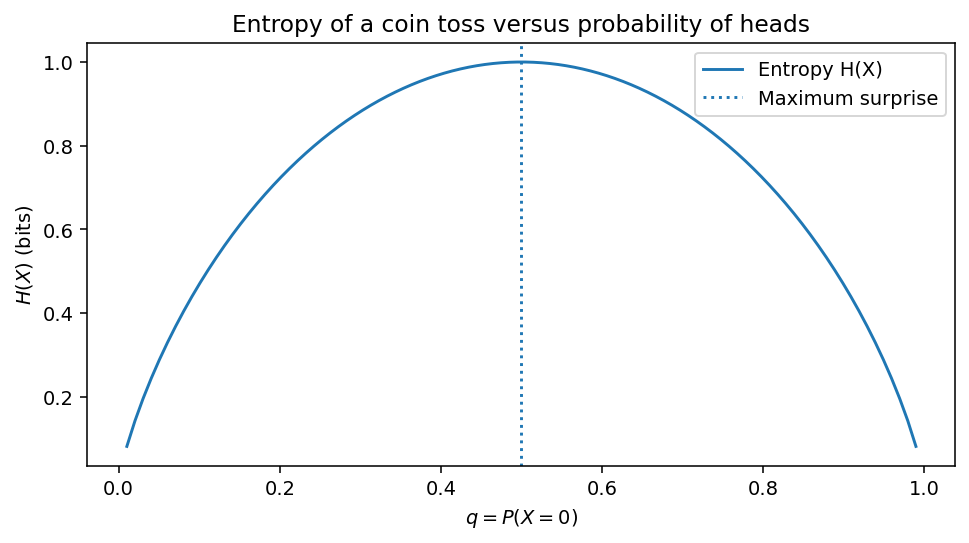

In [4]:
def binary_entropy(q):
    return -q * np.log(q)/np.log(2) - (1-q) * np.log(1-q)/np.log(2)

def plot_binary_entropy():
    x = np.linspace(0,1,100)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(x, binary_entropy(x), label="Entropy H(X)")
    ax.axvline(0.5, ls=':', label='Maximum surprise')
    ax.legend()
    ax.set_xlabel('$q=P(X=0)$')
    ax.set_ylabel('$H(X)$ (bits)')
    ax.set_title("Entropy of a coin toss versus probability of heads")
    
plot_binary_entropy()

This corresponds with our intuition -- an unbiased coin toss is the most surprising distribution. Entropy is a critically important concept in **information theory** which relates probability to the problems of communication. We can measure how well Bayesian updating is going by measuring the drop in entropy of the posterior belief; as we add evidence, we should become less surprised about the possible outcomes.


In our letter-based bigram example, we can compute the entropy of each conditional distribution $P(c_i|c_{i-1})$. This will tell us how surprised we will be by the characters that might follow a character $c_i$.

In [5]:
alphabet = 'abcdefghijklmnopqrstuvwxyz'
def numerify(fname):    
    with open(fname) as f:        
        return np.array([alphabet.index(c) for c in f.read().lower() if c in alphabet])    
    
metamorphosis = numerify("data/metamorphosis.txt")

meta_joint = np.zeros([len(alphabet), len(alphabet)])
for c_1, c_2 in zip(metamorphosis[1:], metamorphosis[:-1]):
    meta_joint[c_2, c_1] += 1

# normalise by total number of pairs
meta_joint = meta_joint / np.sum(meta_joint)   

# compute the marginial probabilities, by summing over the relevant axes
# it's this easy!
meta_c1 = np.sum(meta_joint, axis=0)
meta_c2 = np.sum(meta_joint, axis=1)

meta_conditional = (meta_joint.T / meta_c1).T

Text(0.5, 1.0, 'Entropy of conditional distribution $H(c_i|c_{i-1})$')

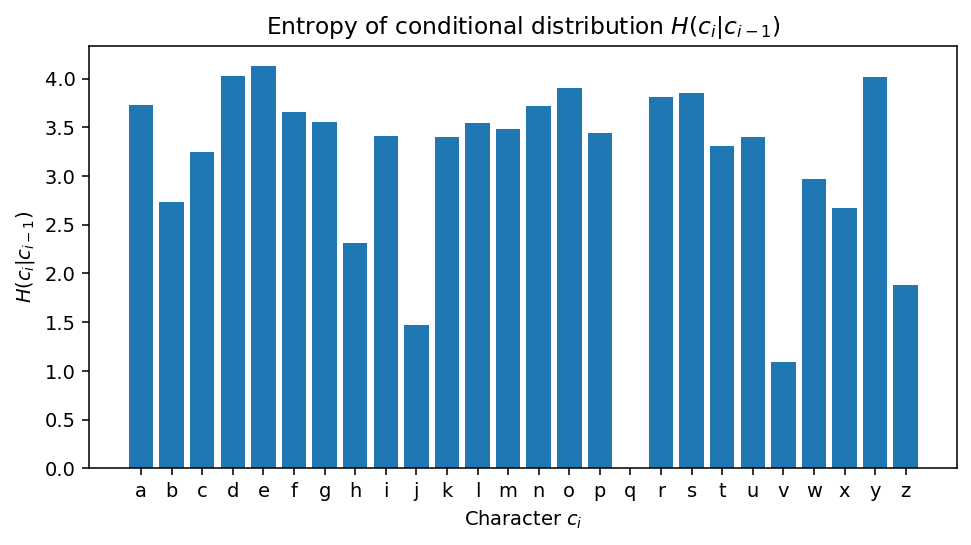

In [6]:
h_meta_conditional = np.sum(-np.log2(meta_conditional+1e-7) * meta_conditional, axis=1)

# plot the entropy of the conditional
fig = plt.figure() 
ax = fig.add_subplot(1,1,1)
plt.bar(np.arange(len(alphabet)), h_meta_conditional)
ax.set_xticks(np.arange(len(alphabet)))
ax.set_xticklabels(alphabet)
ax.set_ylabel("$H(c_i|c_{i-1})$")
ax.set_xlabel("Character $c_i$")
ax.set_title("Entropy of conditional distribution $H(c_i|c_{i-1})$")


#### Interpreting entropy
We can see that observing a "q" means the next character isn't surprising at all: we know for *sure* that it will be a "u", and thus the entropy is 0.  There is only one configuration of the world for the next character (under this model) if we have just seen a "u".

Likewise, seeing a space character gives us very little information, and the next character could be anything: the character after a space will surprise us -- there are lots of configurations of the world that might follow a space. That surprise is as much surprise as we would get by tossing about 4 coins, or an entropy of about 4 bits.

---

# Continuous random variables

## Problems with continuous variables
Continuous random variables are defined by a PDF (probability *density* function), rather than a PMF (probability *mass* function). A PMF essentially just a vector of values, but a PDF is a function mapping *any* input in its domain to a probability.
This seems like a subtle difference (as a PMF has more and more "bins" it gets closer and closer to a PDF, right?), but it has a number of complexities.

* The probability of any specific value is $P(X=x)=0$ *zero* for every possible $x$, yet any value in the *support* of the distribution function (everywhere the PDF is non-zero) is possible. 

* There is no direct way to sample from the PDF in the same way as we did for the PMF. But there are several tricks for sampling from continuous distributions.

* We cannot estimate the true PDF from simple counts of observations like we did for the empirical distribution. This can never "fill in" the PDF, because it will only apply to a single value with zero "width".

* Bayes' Rule is easy to apply to discrete problems. But how do we do computations with continuous PDFs using Bayes' Rule?

* Simple discrete distributions don't have a concept of dimension. But we can have continuous values in $\real$, or in vector spaces $\real^n$, representing the probability of a random variable taking on a vector value, or indeed distributions over other generalisations (matrices, other fields like complex numbers or quaternions and even more sophisticated structures like Riemannian manifolds).

### Probability distribution functions
The PDF $f_X(x)$ of a random variable $X$ maps a value $x$ (which might be a real number, or a vector, or any other continuous value) to a single number, the density at the point. It is a function (assuming a distribution over real vectors) $\real^n \rightarrow \real^+$, where $\real^+$ is the positive real numbers, and $$\int_x f_X(x)=1.$$

* While a PMF can have outcomes with a probability of at most 1, it is *not* the case that the maximum value of a PDF is $f_X(x) \leq 1$ -- *just that the integral of the PDF be 1.*

The value of the PDF at any point is **not** a probability, because the probability of a continuous random variable taking on any specific number must be zero. Instead, we can say that the probability of a continuous random variable $X$ lying in a range $(a,b)$ is:
<div class="alert alert-box alert-success">
    
$$P(X \in (a,b)) = (a < X < b)  = \int_a^b f_X(x)$$
</div>

<img src="imgs/pdf_cdf.png">

#### Support
The **support** of a PDF is the domain it maps from where the density is non-zero. 

$$\text{supp}(x) = x\  \text{such that}\  f_X(x) > 0$$

Some PDFs have density over a fixed interval, and have zero density everywhere else. This is true of the uniform distribution, which has a fixed range where the density is constant, and is zero everywhere. This is called **compact support**. We know that sampling from a random variable with this PDF will always give us values in the range of this support. Some PDFs have non-zero density over an infinite domain. This is true of the normal distribution. A sample from a normal distribution could take on *any* real value at all; it's just much more likely to be close to the mean of the distribution than to be far away. This is **infinite support**.
##### Examples
**infinite support**
<img src="imgs/norm_support.png">
**compact support**
<img src="imgs/uni_support.png">
**semi-infinite support**
<img src="imgs/gamma_support.png">



### Cumulative distribution functions
The **cumulative distribution function** or CDF of a real-valued random variable is 
<div class="alert alert-box alert-success">
    
$$F_X(x) = \int_{-\infty}^x f_X(x) = P(X \leq x)$$
</div>

Unlike the PDF, the CDF always maps $x$ to the codomain [0,1]. For any given value $F_X(x)$ tells us how much probability mass there is that is less than or equal to $x$. Given a CDF, we can now answer questions, like: what is the probability that random variable X takes on a value between 3.0 and 4.0?

$$P(3 \leq X \leq 4) = F_X(4) - F_X(3)$$

This *is* a probability. Sometimes it is more convenient or efficient to do computations with the CDF than with the PDF.


## PDF example: the normal disribution
The most ubiquitous of all continuous PDFs is the **normal** or **Gaussian** distribution. It assigns probabilities to real values $x \in {\mathbb{R}}$ (in other words, a sample space consisting of all of the real numbers). It has a density given by the PDF:

$$f_X(x) = \frac{1}{Z}\, e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$$

You do not need to remember this formula, but it is very useful to know that it is essentially just $e^{-x^2}$ with some scaling factors to normalise it -- this is called the **squared exponential function**.

<div class="alert alert-box alert-info">
    
**Side note:**    

$$Z = \sqrt{2\pi\sigma^2}$$ but you do not need to remember this.
</div>

We use a shorthand notation to refer to the distribution of continuous random variables, 

$$\text{variable}  \sim \text{distribution}(\text{parameters}),$$ where $\sim$ is read as "distributed as". For a normal distribution this is:
$$X \sim \mathcal{N}(\mu, \sigma^2),$$ 
which is read as 

>"Random variable X is distributed as [N]ormal with mean $\mu$ and variance $\sigma^2$"

and means that $X$ has a density function defined by the class of normal density functions with a specific choice of parameters $\mu$ and $\sigma^2$; $f_X(x) = \frac{1}{Z}\, e^{-\frac{(x - \mu)^2}{2 \sigma^2}}.$

There are various other symbols used for other continuous distributions, including $\Gamma(\alpha, \beta), \beta(\alpha, \beta), \mathcal{t}(\nu), \chi^2(k), \dots$, which we will not cover in this course. See the references if you want to learn more.

### Location and scale
The normal distribution places the point of highest density at to its center $\mu$ (the "mean"), with a spread defined by $\sigma^2$ (the "variance"). This can be thought of as the **location** and **scale** of the density function. Most standard continuous random variable PDFs have a location (where density is concentrated) and scale (how spread out the density is).



In [7]:
import scipy.stats as stats
# Plot the PDF of the normal distribution
def plot_normal(mu, sigma):
    # plot the normal (Gaussian distibution) along with a set of points drawn from that distribution
    x = np.linspace(mu-sigma*5,mu+sigma*5,100)
    y = stats.norm.pdf(x,mu,sigma) # mean 0, std. dev. 1
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    ax.plot(x,y, label="PDF")
    ax.axhline(0, color='k', linewidth=0.2) # axis line
 
    # mark the mean
    ax.text(0, 0.51, '$\mu$')
    ax.axvline(0, color='r')
    # highlight one std. dev. to the right
    ax.axvspan(0,1, facecolor='b', alpha=0.1, label="1 std. dev.")
    ax.text(mu+sigma, 0.5, '$\sigma$')
    # take 1000 random samples and scatter plot them
    samples = stats.norm.rvs(mu, sigma,1000)
    ax.scatter(samples, np.full(samples.shape, .2), s=448, c='b', alpha=0.1, marker='|', label="Samples")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$f_X(x)$")
    ax.legend()
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(x, stats.norm.cdf(x,mu,sigma))
    ax.set_title("Cumulative distribution function")
    ax.set_xlabel("x")
    ax.set_ylabel("$c_X(x)$")

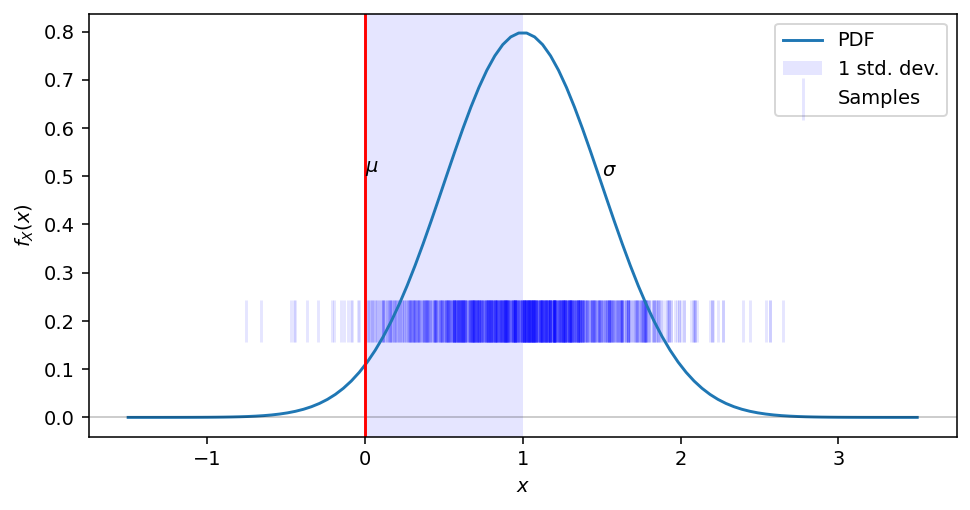

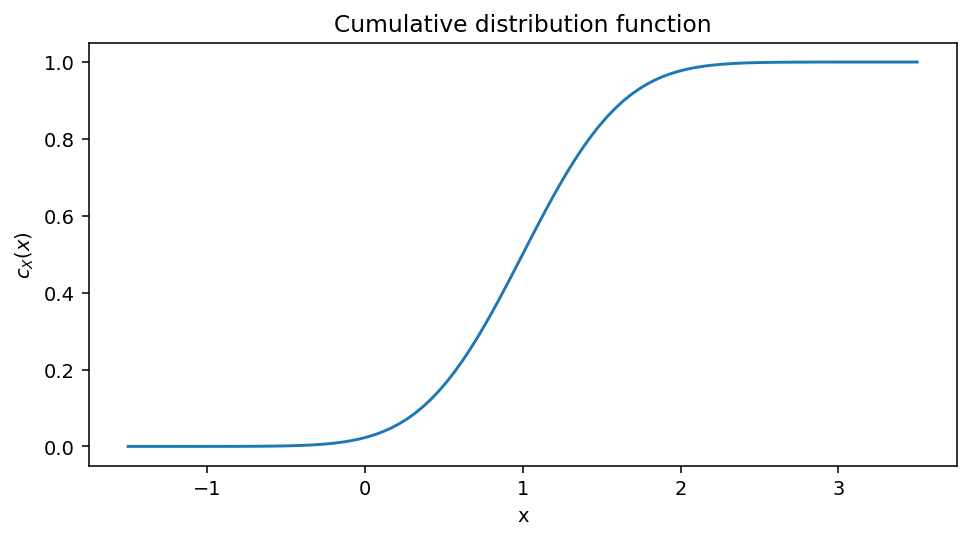

In [8]:
plot_normal(mu=1.0, sigma=0.5)

#### Normal modelling
It seems that this might be a very limiting choice but there are two good reasons for this to work well as a model in many contexts:
1. Normal variables have very nice mathematical properties and are easy to work with analyitically (i.e. without relying on numerical computation).
2. The *central limit theorem* tells us that any sum of random variables (however they are distributed) will tend to a *Levy stable distribution* as the number of variables being summed increases. For most random variables encountered, this means the normal distribution (one specific Levy stable distribution).

### Central limit theorem

If we form a sum of many random variables $$Y = X_1 + X_2 + X_3 + \dots,$$ then for almost any PDF that each of $X_1, X_2,\dots$ might have, the PDF of $Y$ will be approximately normal, $Y \sim \mathcal{N}(\mu, \sigma)$. This means that any process that involves a mixture of many random components will tend to be Gaussian under a wide variety of conditions.

In [9]:
def clt():
    # demonstrate the central limit theorem
    for i in [1,2,3,4,8,16,32]:
        x = np.zeros((20000,))
        # add i copies of samples drawn from uniform (flat) distribution together
        for j in range(i):
            x += np.random.uniform(-0.5,0.5, x.shape)
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax.hist(x/np.sqrt(i), bins=np.linspace(-1.5,1.5,30), density=True)
        ax.set_title("(normalised) sum of %d uniform variables" % (i))
        ax.set_xlabel("$x$")
        ax.set_ylabel("$P(x)$")

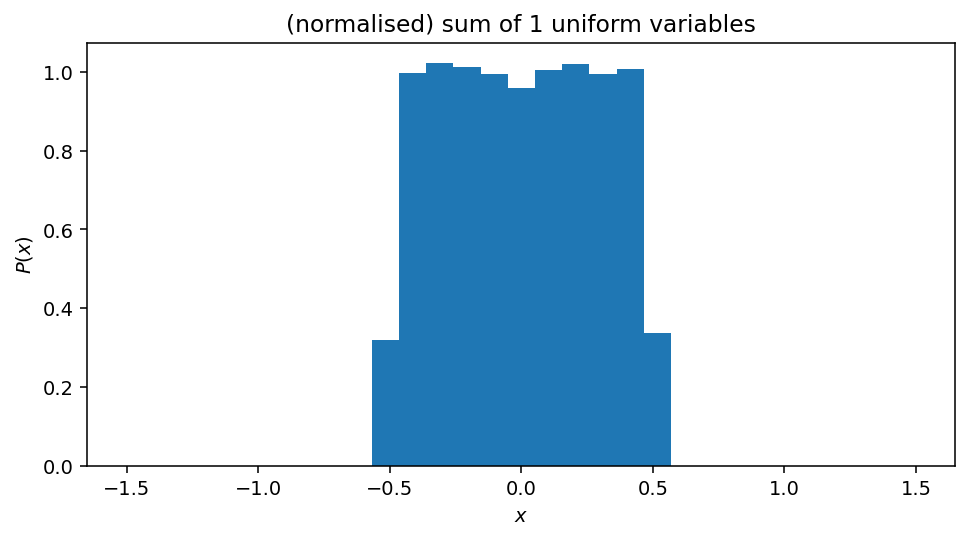

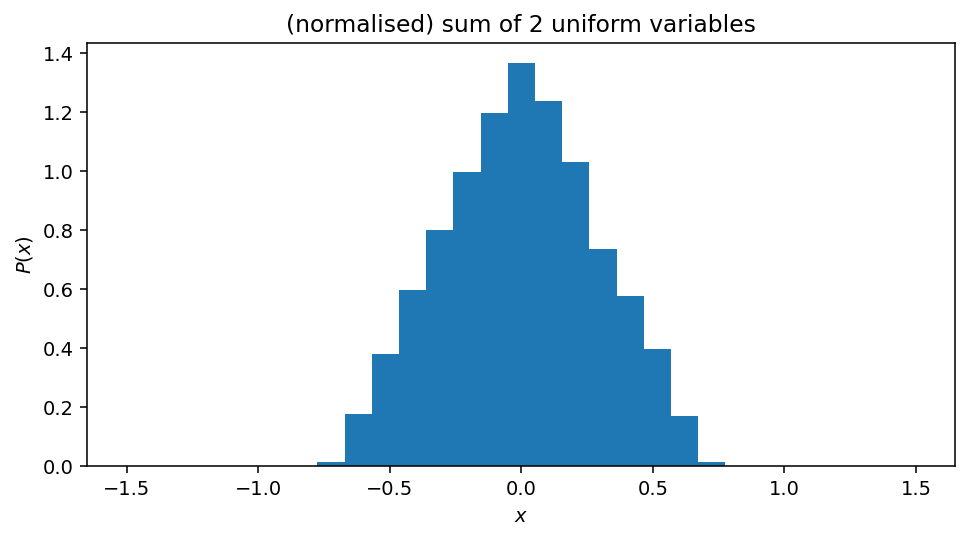

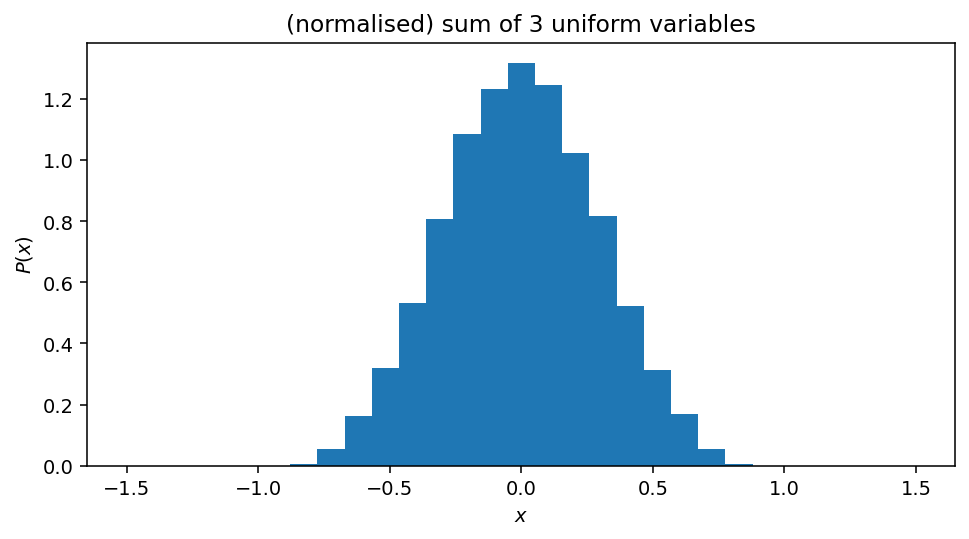

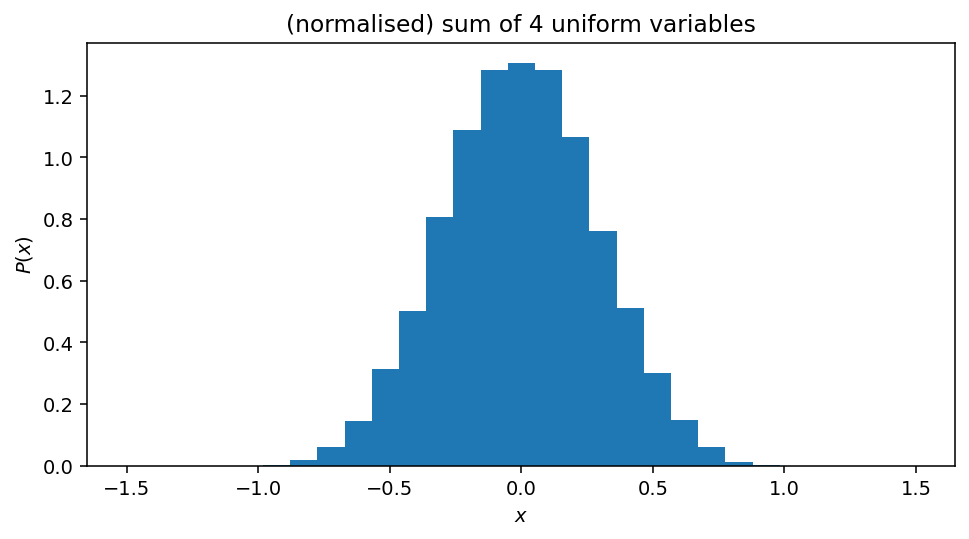

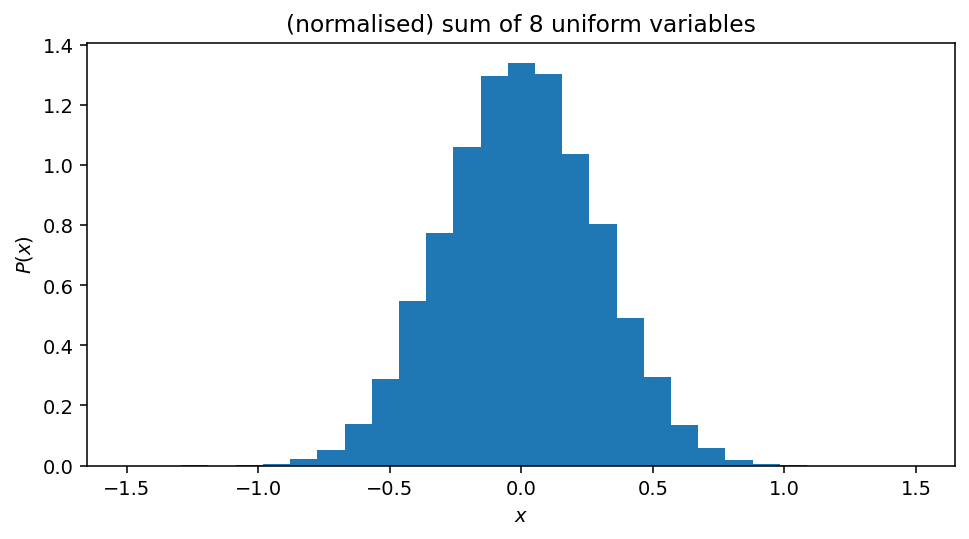

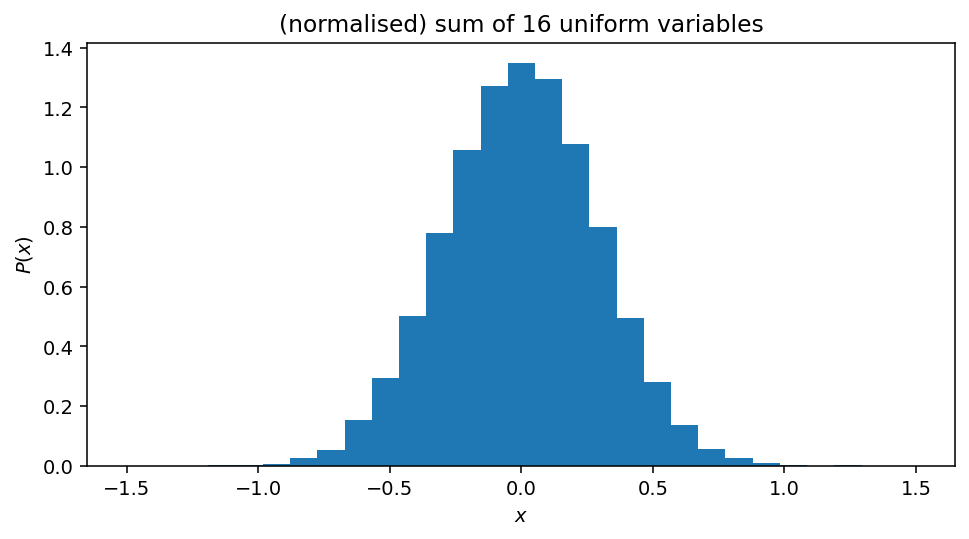

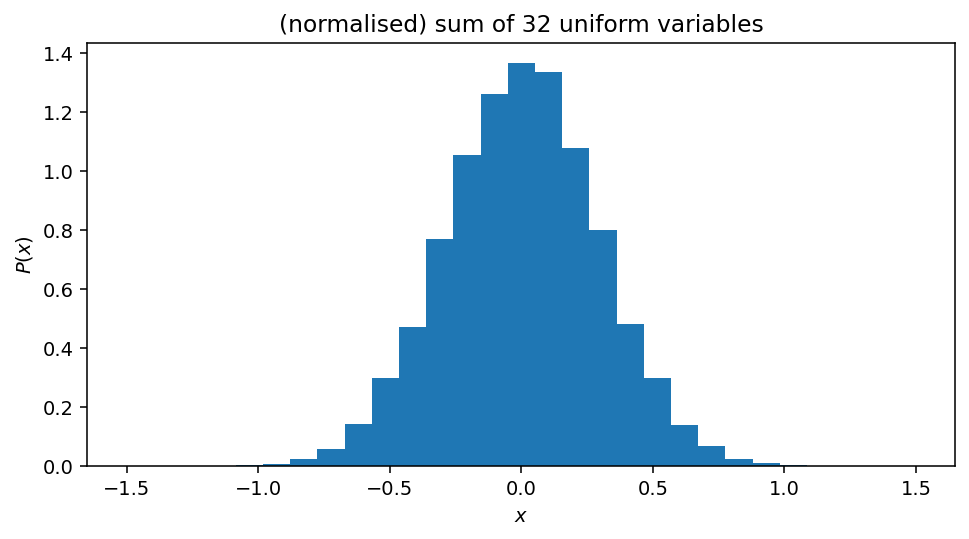

In [10]:
clt()

## Multivariate distributions: distributions over $\real^n$
Continuous distributions generalise discrete variables (probability mass functions) (e.g. over $\mathbb{Z}$) to continuous spaces over $\real$ via probability density functions. 

Probability densities can be further generalised to vector spaces, particularly to $\real^n$. This extends PDFs to assign probability across an entire vector space, under the constraint that the (multidimensional integral) $$\int_{\vec{x}\in\real^n} f_X (\vec{x}) =1.$$
This is the same as:
$$\int_{x_0=-\infty}^{x_0=\infty} \int_{x_1=-\infty}^{x_1=\infty} \dots 
\int_{x_n=-\infty}^{x_n=\infty} f_X ([x_0, x_1, \dots, x_n])\, dx_0 dx_1 \dots dx_n = 1.$$ 

Distributions with PDFs over vector spaces are called **multivariate distributions** (which isn't a very good name; vector distributions might be clearer). In many respects, they work the same as **univariate** continuous distributions. However, they typically require more parameters to specify their form, since they can vary over more dimensions.

### Multivariate uniform
The multivariate uniform distribution is particularly simple to understand. It assigns equal density $ f_X(x_i) = f_X(x_j)$ to some (axis-aligned) box in a vector space $\real^n$, such that $$\int_\vec{x} f_X(\vec{x})=1, \vec{x} \in \text{a box}.$$ 

It is trivial to sample from; we just sample *independently* from a one-dimensional uniform distribution in the range [0,1] to get each element of our vector sample. This is a draw from a n-dimensional uniform distribution in the unit box.


Text(0.5, 1.0, 'Uniform samples in the range $x\\in \\mathbb{R}^2, 0 \\leq x_i \\leq 1 $')

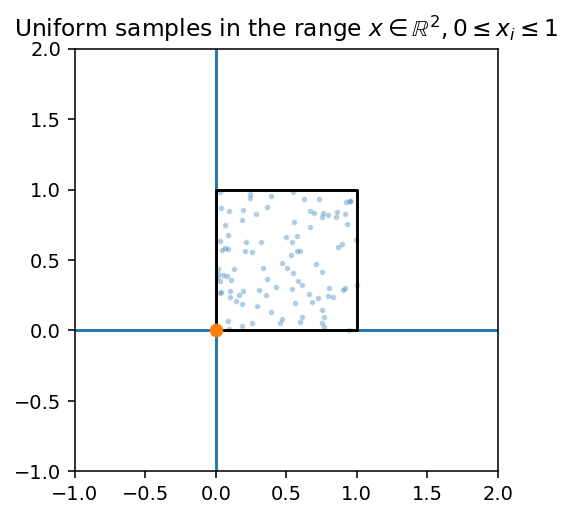

In [11]:
def uniform_nd(n, A = None, b=None, d=2):
    if A is None:
        A = np.eye(d)
    if b is None:
        b = np.zeros(d)        
    return np.random.uniform(0,1, (n,d)) @ A + b, A, b

def draw_pts_2d(pts, A, b):
    # draw the points
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(pts[:,0], pts[:,1], '.', markersize=4,alpha=0.25)
    # set sensible scales    
    ax.set_xlim(-1,2)
    ax.set_ylim(-1,2)
    ax.axvline(0)
    ax.axhline(0)
    ax.set_aspect("equal")
    # draw a bounding box
    bounding = np.array([[0,0],
                         [0,1],
                         [1,1],
                         [1,0],
                         [0,0]]) @ A + b
    
    
    ax.plot(bounding[:,0], bounding[:,1], 'k')
    ax.plot(bounding[0,0], bounding[0,1], 'C1o')

pts, A, b = uniform_nd(100, d=2)
draw_pts_2d(pts, A, b)    
plt.gca().set_title("Uniform samples in the range $x\in \\mathbb{R}^2, 0 \leq x_i \leq 1 $")

## Transformed uniform distribution
If we want to define a distribution over any box, we can simply transform the vectors with a matrix $A$ and shift by adding an offset vector $\vec{b}$

Text(0.5, 1.0, 'Uniform samples in a transformed range')

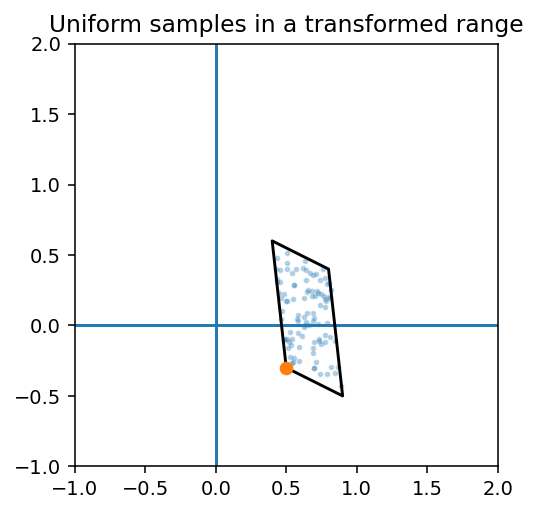

In [12]:
# A is "spread"
A = np.array([[0.4, -0.2], 
              [-0.1, 0.9]])

# b is "offset" or "centre"
b = np.array([0.5, -0.3])

pts, A, b = uniform_nd(100, A=A, b=b, d=2)
draw_pts_2d(pts, A=A, b=b)    
plt.gca().set_title("Uniform samples in a transformed range")

## Normal distribution
The normal distribution (above) is very widely used as the distribution of continuous random variables. It can be defined for a random variable of *any dimension*; a **multivariate normal** in statistical terminology. In Unit 5, we saw the idea of a **mean vector** $\vec{\mu}$ and a **covariance matrix** $\Sigma$ which captured the "shape" of a dataset in terms of an ellipse. *These are in fact the parameterisation of the multivariate normal distribution.*

A multivariate normal is fully specified by a mean vector $\vec{\mu}$ and the covariance matrix $\Sigma$. If you imagine the normal distribution to be a ball shaped mass in space, the mean *translates* the mass, and covariance applies a transformation matrix (scale, rotate and shear) to the ball.

Just like the uniform distribution, we can think of drawing samples from a "unit ball" with an independent normal distribution in each dimension. These samples are transformed linearly by the covariance matrix $\Sigma$ and the mean vector $\mu$, just like $A$ and $b$ above (though $\Sigma$ is actually $A^-\frac{1}{2}$ for technical reasons)

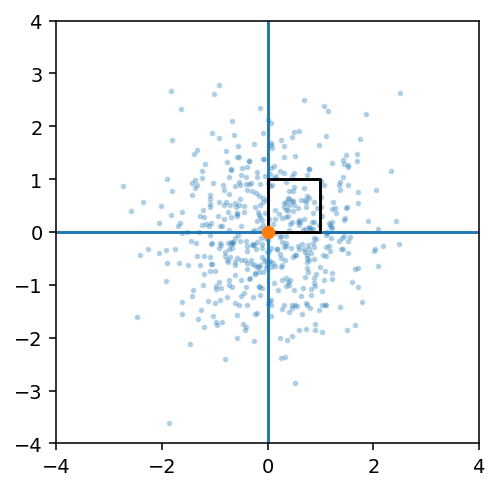

In [13]:
def normal_nd(n, A = None, b=None, d=2):
    if A is None:
        A = np.eye(d)
    if b is None:
        b = np.zeros(d)        
    return np.random.normal(0,1, (n,d)) @ A + b, A, b

pts, A, b = normal_nd(500, A=None, b=None, d=2)
draw_pts_2d(pts, A=A, b=b)    
plt.gca().set_xlim(-4,4)
plt.gca().set_ylim(-4,4)

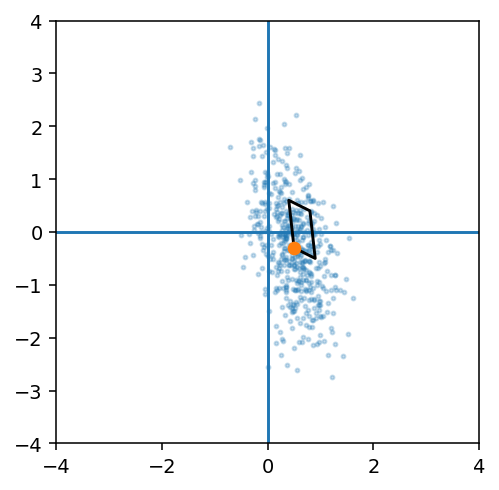

In [14]:
# A is "spread"
A = np.array([[0.4, -0.2], [-0.1, 0.9]])
# b is "offset" or "centre"
b = np.array([0.5, -0.3])
pts, A, b = normal_nd(500, A=A, b=b, d=2)
draw_pts_2d(pts, A=A, b=b)    
plt.gca().set_xlim(-4,4)
plt.gca().set_ylim(-4,4)

### Joint and  marginal PDFs
We can look at the PDF of a multivariate normals for different covariances and mean vector (centres and spreads).

<ipython-input-15-c1bc10ddc5ce>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolor(x,y,joint_pdf, cmap='viridis', vmin=0, vmax=0.25)


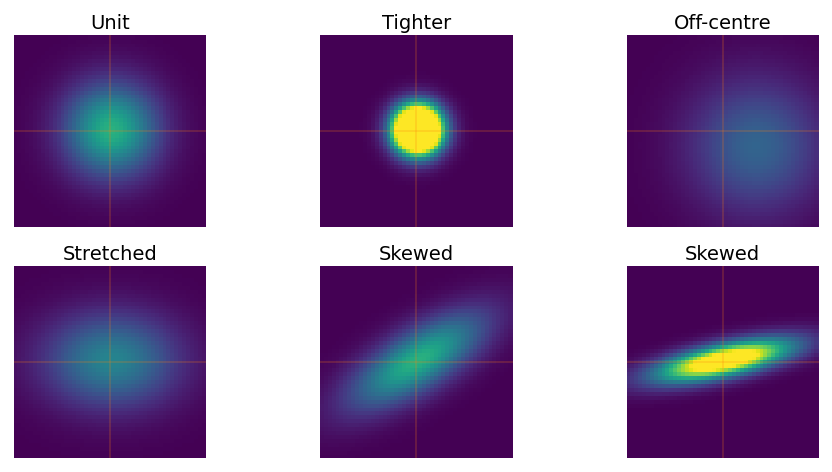

In [15]:
import scipy.stats
def demo_normal(ax, mean, cov, title):
    x,y = np.meshgrid(np.linspace(-3,3,50), np.linspace(-3,3,50))
    pos = np.empty(x.shape + (2,))
    pos[:,:,0] = x
    pos[:,:,1] = y
    joint_pdf = scipy.stats.multivariate_normal.pdf(pos, mean, cov)
    ax.pcolor(x,y,joint_pdf, cmap='viridis', vmin=0, vmax=0.25)
    
    ax.axhline(0, color='C1', linewidth=0.2)
    ax.axvline(0, color='C1', linewidth=0.2)
    ax.text(0, 3.2, title, ha='center')
    ax.axis("off")
    ax.axis("image")
    
    
fig = plt.figure()  
ax = fig.add_subplot(2,3,1)
demo_normal(ax, [0,0], [[1,0],[0,1]], "Unit")    
ax = fig.add_subplot(2,3,2)
demo_normal(ax, [0,0], [[0.25,0],[0,0.25]], "Tighter")    
ax = fig.add_subplot(2,3,3)
demo_normal(ax, [1,-0.5], [[2,0],[0,2]], "Off-centre") 
ax = fig.add_subplot(2,3,4)
demo_normal(ax, [0,0], [[2,0],[0,1]], "Stretched") 
ax = fig.add_subplot(2,3,5)
demo_normal(ax, [0,0], [[2,0.1],[1,1]], "Skewed") 
ax = fig.add_subplot(2,3,6)
demo_normal(ax, [0,0], [[2,-0.9],[0.4,0.2]], 'Skewed') 

### Joint and marginal distributions
We can now talk about the **joint probability density function** (density over all dimensions) and the **marginal probability density function** (density over some sub-selection of dimensions).

For example, consider $X \sim N(\vec{\mu}, \Sigma), X \in \real^2$, a two dimensional ("bivariate") normal distribution. We can look at some examples of the PDF, showing:

* Joint $P(\vec{X})$
* Marginal $P(X_1$) and $P(X_2)$
* Conditionals $P(X_1|X_2)$ and $P(X_2|X_1)$

In [16]:
import scipy.stats
def joint_marginal(cov):    
    # create an independent 2D normal distribution
    x,y = np.meshgrid(np.linspace(-3,3,50), np.linspace(-3,3,50))
    pos = np.empty(x.shape + (2,))
    pos[:,:,0] = x
    pos[:,:,1] = y
    joint_pdf = scipy.stats.multivariate_normal.pdf(pos, [0,0], cov)
    fig = plt.figure()
    # plot the joint
    ax = fig.add_subplot(2,2,1)
    ax.axis('equal')
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    plt.title("Joint $P(\\vec{x})=P(x_1,x_2)$")
    ax.pcolor(x,y,joint_pdf, cmap='viridis')
    # plot the marginals
    ax = fig.add_subplot(2,2,3)
    ax.axis('equal')
    plt.title("Marginal $P(x_1) = \int\  P(x_1,x_2) dx_2$")
    ax.plot(x[0,:], np.sum(joint_pdf, axis=0))
    ax = fig.add_subplot(2,2,2)
    ax.axis('equal')
    plt.title("Marginal $P(x_2) = \int\  P(x_1,x_2) dx_1$")
    ax.plot(np.sum(joint_pdf, axis=1), x[0,:])
    plt.tight_layout()
    
    # plot p(x|y) and p(y|x)
    fig = plt.figure()
    # plot the joint
    ax = fig.add_subplot(2,2,1)
    ax.axis('equal')
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    plt.title("Joint $P(\\vec{x})=P(x_1,x_2)$")
    ax.pcolor(x,y,joint_pdf, cmap='viridis')
    ax = fig.add_subplot(2,2,3)
    ax.axis('equal')
    plt.title("Conditional $P(x_1|x_2) = \\frac{P(x_1,x_2)}{p(x_2)}$")
    marginal = np.tile(np.sum(joint_pdf, axis=0), (joint_pdf.shape[0],1))
    ax.pcolor(x,y,joint_pdf/marginal, cmap='viridis')
    plt.tight_layout()
    ax = fig.add_subplot(2,2,2)
    ax.axis('equal')
    plt.title("Conditional $P(x_2|x_1) = \\frac{P(x_1,x_2)}{p(x_1)}$")
    marginal = np.tile(np.sum(joint_pdf, axis=1), (joint_pdf.shape[0],1))
    ax.pcolor(x,y,joint_pdf/marginal.T, cmap='viridis')
    plt.tight_layout()
  

<ipython-input-16-e35d9a767056>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolor(x,y,joint_pdf, cmap='viridis')
<ipython-input-16-e35d9a767056>:36: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolor(x,y,joint_pdf, cmap='viridis')
<ipython-input-16-e35d9a767056>:41: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or 

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

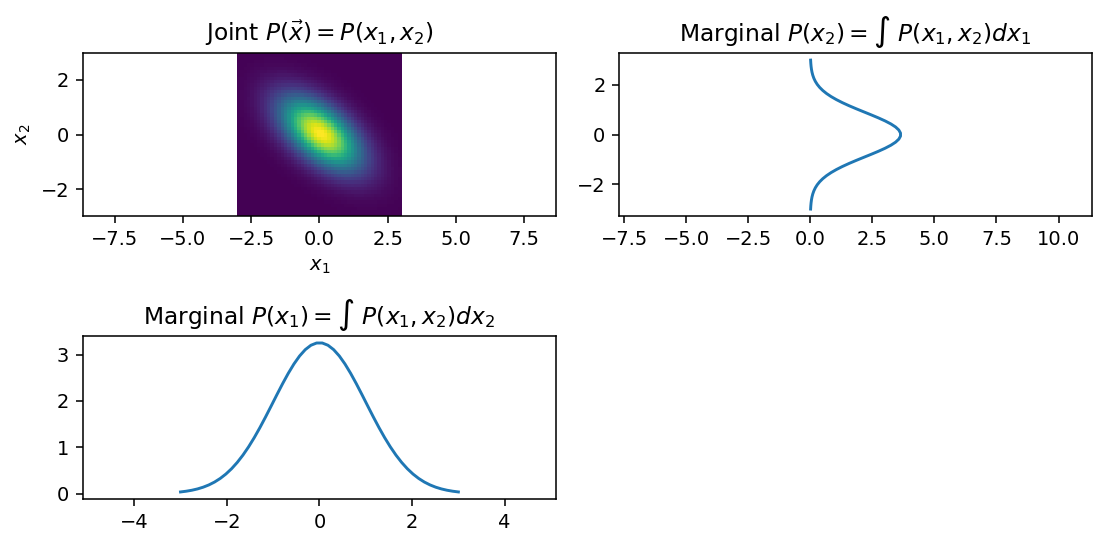

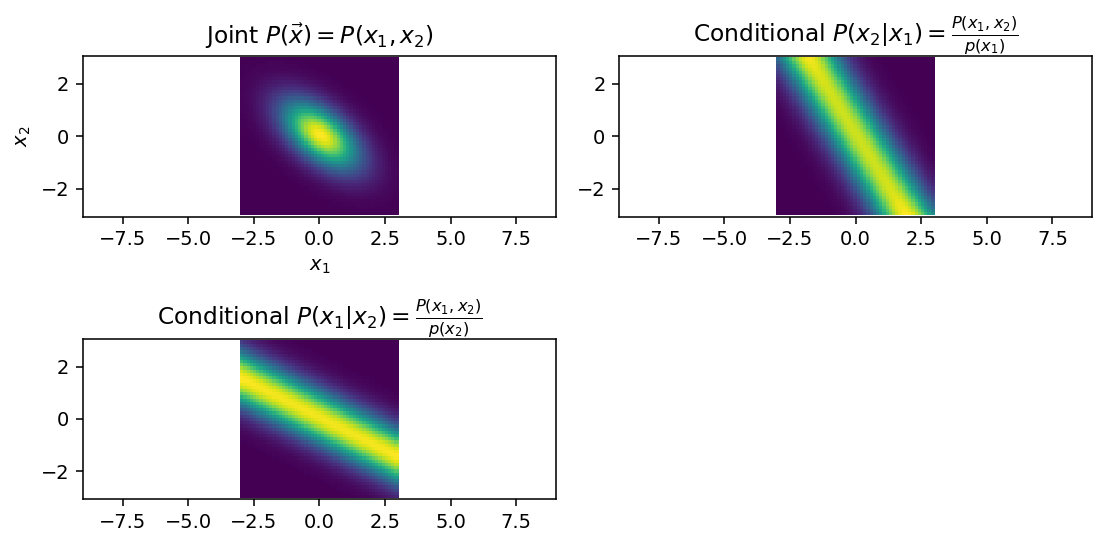

In [17]:
joint_marginal([[1, -0.3], [-0.5, 0.8]])
print_matrix("\mu", np.array([0.0, 0.0]))
print_matrix("\Sigma", np.array([[1, 0], [0.5, 1]]))
plt.tight_layout()

### Ellipses
When we spoke informally about the covariance matrix "covering" the data with an ellipsoidal shape, we more precisely meant that
*if* we represented the data as being generated with a normal distribution, and chose the mean vector and covariance matrix that best approximated that data, then the contours of the density of the PDF corresponding to equally spaced isocontours would be ellipsoidal.

# Monte Carlo 

How do we *draw* samples from a continuous distribution? How can we simulate the outcomes of a random variable $X$? This is a vital tool in computational statistics. One of the reasons computers are useful for statistical analysis is that they can generate (pseudo)-random numbers very quickly.

## von Neumann and Ulam
During the *Manhattan project* that developed the atomic bomb during the Second World War, there were many difficult probabilistic equations to work out. Although *analytical techniques* for solving certain kinds of problems existed, they were only effective some narrow types of problem and were tricky to apply to the problems that the Manhattan project had to solve.

<img src="imgs/ulam_neumann.png">
<br>

John von Neumann and Stanislaw Ulam developed the **Monte Carlo** method to approximate the answer to probabilistic problems, named after the casinos of Monte Carlo. This involved setting up a *simulation* with stochastic (random) components. By running the simulation many times with different random behaviour, the population of *possible* behaviours could be approximated.

For example, computing the expectation of a function of a random variable can often be hard for continuous random variables. The integral for:

$$\expect{g(X)} = \int_x f_X(x) g(x)\ dx$$

may be intractable. However it is often very easy to compute $g(x)$ for any possible $x$. If we can somehow sample from the distribution $P(X=x)$, then we can approximate this very easily:
<div class="alert alert-box alert-success">
    
$$\expect{g(X)} = \int_x f_X(x) g(x)\ dx \approx \frac{1}{N} \sum_{i=1}^N g(x_i)\ ,$$ 
</div>
where $x_i$ are random samples from $P(X=x)$, defined by the PDF $f_X(x)$. This gets better as $N$ gets larger.

### Throwing darts
For example, imagine trying to work out the expectation of dart throw. A dart board has sections giving different scores. We might model the position of the dart as a normal distribution over the dart space. This models the human variability in throwing. The expected score of a throw requires evaluating the integral of the normal PDF multiplied by the score at each point -- which isn't feasible to compute directly.

<img src="imgs/dartboard_normal.png" width="40%">

But we can sample from a multivariate normal distribution easily; we saw this in the last unit; just sample from $d$ independent standard normals, and transform with a linear transform (matrix). So instead of trying to solve a very hard integral, we can simulate lots of dart throws, which follow the pattern of the normal distribution, and take the average score that they get. If we simulate a lot of darts, the average will be close to the true value of the integral.

<img src="imgs/dartboard_darts.png" width="40%">

## Bullseye example
For example, we might want to define a circular score region, which gives us 25 points if we land in it, 50 points if we lie in a smaller coencentric circle, and 0 otherwise; this is our function $g(X)$. We might model the throw of the dart with a multivariate normal. How do we compute the expected score $E[g(X)]$?


C:\Users\Chris\anaconda3\lib\site-packages\scipy\stats\_multivariate.py:664: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


E[g(X)] ~= 3.975


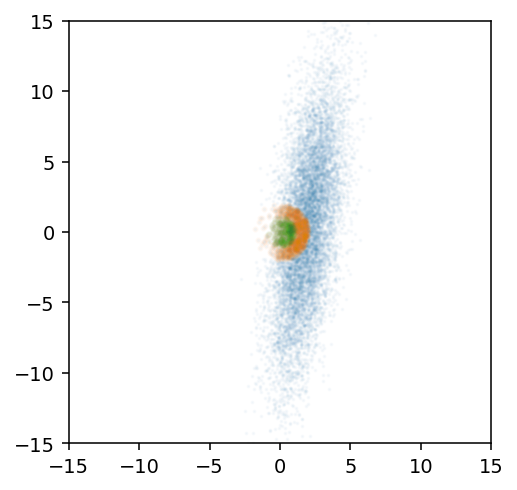

In [18]:
# centre of throw distribution
mu = [1.9, 0.3] 

# spread
sigma = [[4, 27.5],
         [-0.2, 7]]

N = 10000

# draw N samples
throws = scipy.stats.multivariate_normal(mean=mu, cov=sigma).rvs(N)

# check radius from a centre point
outer = np.linalg.norm(throws - np.array([0,0]), axis=1) < 2
inner = np.linalg.norm(throws - np.array([0,0]), axis=1) < 1

# plot the results
fig, ax = plt.subplots()
ax.scatter(throws[:,0], throws[:,1], s=1, alpha=np.sqrt(10.0/N))
ax.scatter(throws[outer,0], throws[outer,1], s=5, c='C1', alpha=np.sqrt(10.0/N))
ax.scatter(throws[inner,0], throws[inner,1], s=8, c='C2', alpha=np.sqrt(10.0/N))
ax.set_aspect("equal")
ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15);

# compute approximate expectation
print("E[g(X)] ~=", np.mean(outer*25 + inner*50))

While this might seem like a unsubstantiated "hack", random sampling approaches in fact have strong statistical guarantees and are exceptionally powerful methods for performing **inference.**

---




## Resources
* **Bayesian methods for Hackers** https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers (a full "book" on Bayesian methods and inference)
* [**MCMC for dummies**](http://twiecki.github.io/blog/2015/11/10/mcmc-sampling/)
* [**Bayesian Linear Regression**](https://www.chrisstucchio.com/blog/2017/bayesian_linear_regression.html) 

